### **Email Spam Classifier**
**Goal:** Train a spam classifier using natural language processing techniques and machine learning (e.g., Naive Bayes or Logistic Regression).

**Load the Spam Dataset**
Use the SMS Spam Collection Dataset from UCI, or a similar CSV.

https://archive.ics.uci.edu/dataset/228/sms+spam+collection

In [4]:
import pandas as pd
# Load the dataset
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']
# Convert labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Preprocess the Text**

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

**Train a Classifier (e.g., Naive Bayes)**

In [6]:
from sklearn.naive_bayes import MultinomialNB
# Train model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

**Evaluate the Model**

Accuracy: 0.9668161434977578

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



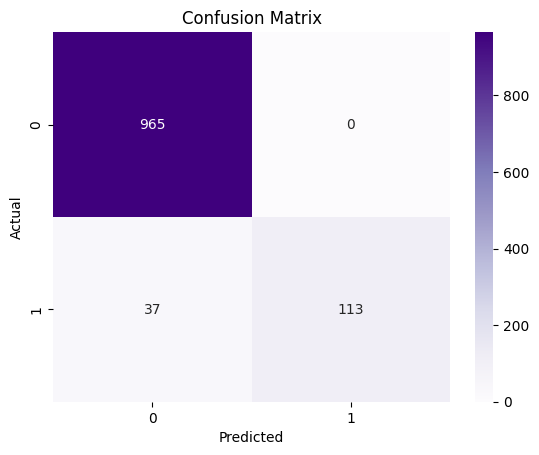

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = model.predict(X_test_vec)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Test on a Custom Email**

In [9]:
email = ["You've won a $1000 gift card. Click here to claim it now!"]
email_vec = vectorizer.transform(email)
prediction = model.predict(email_vec)
print("Spam" if prediction[0] == 1 else "Not Spam")

Spam


### 📝 **Summary**

This project builds a spam classifier that can distinguish between spam and non-spam (ham) messages using Natural Language Processing and Machine Learning.

**Steps:**
1. Loaded and cleaned the SMS Spam Collection Dataset.
2. Converted text messages into numerical features using **TF-IDF**.
3. Split the data into training and testing sets.
4. Trained a **Multinomial Naive Bayes** classifier.
5. Evaluated the model using accuracy, precision, recall, and confusion matrix.

**Model Used:** Multinomial Naive Bayes  
**Text Representation:** TF-IDF (Term Frequency–Inverse Document Frequency)

**Results:**
- **Accuracy:** 96.7%
- **Precision (Spam):** 1.00
- **Recall (Spam):** 0.75
- **F1 Score (Spam):** 0.86

✅ The model performs very well, especially in avoiding false positives. It could be further improved by enhancing recall using techniques like oversampling or different models.
